<a href="https://colab.research.google.com/github/zhanna-naumenko/DI-Bootcamp/blob/main/W9D2_ExercisesXP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exercise 1**

In [1]:
!pip install openai
!pip install requests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.5 MB/s eta 0:00:00


In [2]:
!pip install anthropic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.1/871.1 kB 7.8 MB/s eta 0:00:00


In [3]:
!pip install kaggle

# Upload kaggle.json file (Run this cell and select your kaggle.json file through the file picker)
from google.colab import files
uploaded = files.upload()

# Make directory named kaggle and copy kaggle.json file there
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change the permissions of the file
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [47]:
!kaggle datasets download -d mashlyn/online-retail-ii-uci

Dataset URL: https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci
License(s): CC0-1.0
 62% 9.00M/14.5M [00:00<00:00, 30.8MB/s]
100% 14.5M/14.5M [00:00<00:00, 45.3MB/s]


In [48]:
!unzip online-retail-ii-uci.zip

Archive:  online-retail-ii-uci.zip
  inflating: online_retail_II.csv    


In [49]:
import pandas as pd

retail_data = pd.read_csv('online_retail_II.csv')
retail_data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [50]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [51]:
retail_data.drop_duplicates()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [52]:
retail_data['InvoiceDate'] = pd.to_datetime(retail_data['InvoiceDate'])

In [53]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [54]:
retail_data.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [55]:
retail_data.dropna(subset=['Customer ID'], inplace=True)

In [56]:
retail_data.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [57]:
import anthropic
import pandas as pd
# Load the dataset and convert 'InvoiceDate' to datetime format
dataset = pd.read_csv('online_retail_II.csv', parse_dates=['InvoiceDate'])
# Replace 'your_api_key' with your actual Claude API key
api_key = "My API KEY"
# Initialize the Claude client with your API key
client = anthropic.Client(api_key=api_key)
# Choose the appropriate Claude model for text-based analysis
model = "claude-3-opus-20240229"
# Formulate a question to ask Claude
question = f"How can I calculate RFM (Recency, Frequency, Monetary) scores for each customer in this dataset using the 'InvoiceDate', 'Quantity', and 'Price' columns?"
# Use the Messages API for a single query or stateless multi-turn conversations.
response = client.messages.create(
    model=model,
    messages=[
        {"role": "user", "content": question}
    ],
    max_tokens=1024
)
# Assuming 'stream' is the correct method to get the streamed response:
# Note: This is based on the latest info you provided but might need to adapt if method names have changed in SDK.
try:
    with client.messages.stream(
        model=model,
        messages=[{"role": "user", "content": question}],
        max_tokens=1024
    ) as stream:
        for text in stream.text_stream:
            print(text, end="", flush=True)
except Exception as e:
    print(f"Error during streaming: {str(e)}")

To calculate RFM (Recency, Frequency, Monetary) scores for each customer in your dataset, you can follow these steps using Python and the Pandas library:

1. Assuming your dataset is loaded into a Pandas DataFrame called `df`, first, calculate the 'Total Price' for each transaction by multiplying 'Quantity' and 'Price' columns:

```python
df['Total Price'] = df['Quantity'] * df['Price']
```

2. Calculate the Recency score for each customer:
   - Find the maximum date in the 'InvoiceDate' column.
   - Group the data by the customer identifier (e.g., 'CustomerID') and find the maximum 'InvoiceDate' for each customer.
   - Calculate the difference between the maximum date and each customer's last transaction date.
   - Assign a score based on the recency, where a higher score indicates more recent activity.

```python
from datetime import datetime

max_date = df['InvoiceDate'].max()
recency_df = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency_df['Recency'] = (max_date 

In [14]:
retail_data_copy = retail_data.copy()

In [59]:
# Calculate Recency
# reference_date = retail_data_copy['InvoiceDate'].max()
reference_date = pd.to_datetime('now')
recency_df = retail_data_copy.groupby('Customer ID')['InvoiceDate'].max().reset_index()
recency_df['Recency'] = (reference_date - recency_df['InvoiceDate']).dt.days

# Calculate Frequency
frequency_df = retail_data_copy.groupby('Customer ID')['InvoiceDate'].count().reset_index()
frequency_df.columns = ['Customer ID', 'Frequency']

# Calculate Monetary Value
monetary_df = retail_data_copy.groupby('Customer ID')[['Quantity', 'Price']].sum().reset_index()
monetary_df['Monetary'] = monetary_df['Quantity'] * monetary_df['Price']

# Merge the Recency, Frequency, and Monetary DataFrames
rfm_df = pd.merge(recency_df, frequency_df, on='Customer ID')
rfm_df = pd.merge(rfm_df, monetary_df[['Customer ID', 'Monetary']], on='Customer ID')

# Assign RFM Scores (example using quintiles)
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], q=5, labels=[5, 4, 3, 2, 1])
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'], q=5, labels=[1, 2, 3, 4, 5])
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], q=5, labels=[1, 2, 3, 4, 5])

# Calculate the overall RFM score for each customer by concatenating the individual R, F, and M scores
rfm_df['RFM Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

# Print the resulting RFM DataFrame
print(rfm_df)

      Customer ID         InvoiceDate  Recency  Frequency    Monetary R_Score  \
0         12346.0 2011-01-18 10:17:00     4866         48    30182.88       2   
1         12347.0 2011-12-07 15:52:00     4542        253  2116709.76       5   
2         12348.0 2011-09-25 13:13:00     4615         51   524073.40       3   
3         12349.0 2011-11-21 09:51:00     4559        180  2435931.21       4   
4         12350.0 2011-02-02 16:01:00     4850         17    12864.10       2   
...           ...                 ...      ...        ...         ...     ...   
5937      18283.0 2011-12-06 12:02:00     4543        986  2980326.75       5   
5938      18284.0 2010-10-06 12:31:00     4969         29    57232.37       1   
5939      18285.0 2010-02-17 10:24:00     5201         12    14529.00       1   
5940      18286.0 2010-08-20 11:57:00     5016         70   181477.60       1   
5941      18287.0 2011-10-28 09:29:00     4583        156  1050507.79       4   

     F_Score M_Score RFM Sc

In [22]:
rfm_df.head()

,Customer ID,InvoiceDate,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
0,12346.0,2011-01-18 10:17:00,4865,48,30182.88,2,3,2
1,12347.0,2011-12-07 15:52:00,4542,253,2116709.76,5,5,5
2,12348.0,2011-09-25 13:13:00,4615,51,524073.40,3,3,4
3,12349.0,2011-11-21 09:51:00,4558,180,2435931.21,5,4,5
4,12350.0,2011-02-02 16:01:00,4850,17,12864.10,2,2,2


In [61]:

# Formulate a question to ask Claude
question = (f"You are a data analyst. Write a python code to segment customers from dataset {rfm_df.head(10).to_string()} into groups like High-Value, Loyal, or New")
# Use the Messages API for a single query or stateless multi-turn conversations.
response = client.messages.create(
    model=model,
    messages=[
        {"role": "user", "content": question}
    ],
    max_tokens=1024
)
# Assuming 'stream' is the correct method to get the streamed response:
# Note: This is based on the latest info you provided but might need to adapt if method names have changed in SDK.
try:
    with client.messages.stream(
        model=model,
        messages=[{"role": "user", "content": question}],
        max_tokens=1024
    ) as stream:
        for text in stream.text_stream:
            print(text, end="", flush=True)
except Exception as e:
    print(f"Error during streaming: {str(e)}")

To segment customers based on the RFM (Recency, Frequency, Monetary) scores, you can use the following Python code:

```python
import pandas as pd

# Assuming the dataset is stored in a CSV file named 'customer_data.csv'
df = pd.read_csv('customer_data.csv')

# Define the segment labels based on RFM scores
def get_segment(rfm_score):
    if rfm_score >= 444:
        return 'High-Value'
    elif rfm_score >= 333:
        return 'Loyal'
    elif rfm_score >= 222:
        return 'Potential'
    else:
        return 'New'

# Apply the segmentation function to the 'RFM Score' column
df['Segment'] = df['RFM Score'].astype(str).apply(get_segment)

# Print the segmented dataset
print(df)
```

In this code:

1. We assume that the dataset is stored in a CSV file named 'customer_data.csv'. You can replace it with the actual file path or modify the code to read the data from a different source.

2. We define a function called `get_segment()` that takes the RFM score as input and returns the corres

In [66]:
rfm_df['RFM Score'] = rfm_df['RFM Score'].astype(int)
# Define the segment labels based on RFM scores
def get_segment(rfm_score):
    if rfm_score >= 444:
        return 'High-Value'
    elif rfm_score >= 333:
        return 'Loyal'
    elif rfm_score >= 222:
        return 'Potential'
    else:
        return 'New'

# Apply the segmentation function to the 'RFM Score' column
rfm_df['Segment'] = rfm_df['RFM Score'].astype(int).apply(get_segment)

# Print the segmented dataset
print(rfm_df)

      Customer ID         InvoiceDate  Recency  Frequency    Monetary R_Score  \
0         12346.0 2011-01-18 10:17:00     4866         48    30182.88       2   
1         12347.0 2011-12-07 15:52:00     4542        253  2116709.76       5   
2         12348.0 2011-09-25 13:13:00     4615         51   524073.40       3   
3         12349.0 2011-11-21 09:51:00     4559        180  2435931.21       4   
4         12350.0 2011-02-02 16:01:00     4850         17    12864.10       2   
...           ...                 ...      ...        ...         ...     ...   
5937      18283.0 2011-12-06 12:02:00     4543        986  2980326.75       5   
5938      18284.0 2010-10-06 12:31:00     4969         29    57232.37       1   
5939      18285.0 2010-02-17 10:24:00     5201         12    14529.00       1   
5940      18286.0 2010-08-20 11:57:00     5016         70   181477.60       1   
5941      18287.0 2011-10-28 09:29:00     4583        156  1050507.79       4   

     F_Score M_Score  RFM S

In [29]:
# the answer of Claude without RFM Score
# Define the segment labels based on RFM scores
def assign_segment(row):
    if row['R_Score'] >= 4 and row['F_Score'] >= 4 and row['M_Score'] >= 4:
        return 'High-Value'
    elif row['R_Score'] >= 3 and row['F_Score'] >= 3 and row['M_Score'] >= 3:
        return 'Loyal'
    else:
        return 'New'

# Apply the assign_segment function to each row and create a new 'Segment' column
rfm_df['Segment'] = rfm_df.apply(assign_segment, axis=1)

# Print the segmented customer data
print(rfm_df)

      Customer ID         InvoiceDate  Recency  Frequency    Monetary R_Score  \
0         12346.0 2011-01-18 10:17:00     4865         48    30182.88       2   
1         12347.0 2011-12-07 15:52:00     4542        253  2116709.76       5   
2         12348.0 2011-09-25 13:13:00     4615         51   524073.40       3   
3         12349.0 2011-11-21 09:51:00     4558        180  2435931.21       5   
4         12350.0 2011-02-02 16:01:00     4850         17    12864.10       2   
...           ...                 ...      ...        ...         ...     ...   
5937      18283.0 2011-12-06 12:02:00     4543        986  2980326.75       5   
5938      18284.0 2010-10-06 12:31:00     4969         29    57232.37       1   
5939      18285.0 2010-02-17 10:24:00     5200         12    14529.00       1   
5940      18286.0 2010-08-20 11:57:00     5016         70   181477.60       1   
5941      18287.0 2011-10-28 09:29:00     4582        156  1050507.79       4   

     F_Score M_Score     Se

**Exercise 2**

In [68]:
# Formulate a question to ask Claude
question = (f"You are a data analyst. Write a python code to generate anonymized data for dataset {retail_data_copy.head(10).to_string()} for the personal identifiers such as columns 'Customer ID' and  'Country' or use a hashing function.")
# Use the Messages API for a single query or stateless multi-turn conversations.
response = client.messages.create(
    model=model,
    messages=[
        {"role": "user", "content": question}
    ],
    max_tokens=1024
)
# Assuming 'stream' is the correct method to get the streamed response:
# Note: This is based on the latest info you provided but might need to adapt if method names have changed in SDK.
try:
    with client.messages.stream(
        model=model,
        messages=[{"role": "user", "content": question}],
        max_tokens=1024
    ) as stream:
        for text in stream.text_stream:
            print(text, end="", flush=True)
except Exception as e:
    print(f"Error during streaming: {str(e)}")

To generate anonymized data for the dataset, we can replace the personal identifiers such as 'Customer ID' and 'Country' with hashed values using a hashing function. Here's an example Python code that demonstrates this:

```python
import pandas as pd
import hashlib

# Load the dataset into a pandas DataFrame
df = pd.read_csv('dataset.csv')

# Define a hashing function
def hash_value(value):
    return hashlib.sha256(str(value).encode('utf-8')).hexdigest()

# Apply the hashing function to the 'Customer ID' and 'Country' columns
df['Customer ID'] = df['Customer ID'].apply(hash_value)
df['Country'] = df['Country'].apply(hash_value)

# Save the anonymized dataset to a new CSV file
df.to_csv('anonymized_dataset.csv', index=False)
```

Explanation:

1. We start by importing the necessary libraries: `pandas` for data manipulation and `hashlib` for hashing.

2. We assume that the dataset is stored in a CSV file named 'dataset.csv'. We load the dataset into a pandas DataFrame using `pd.read_csv

In [69]:
import hashlib

# Define a hashing function
def hash_value(value):
    return hashlib.sha256(str(value).encode('utf-8')).hexdigest()

# Apply the hashing function to the 'Customer ID' and 'Country' columns
retail_data_copy['Customer ID'] = retail_data_copy['Customer ID'].apply(hash_value)
retail_data_copy['Country'] = retail_data_copy['Country'].apply(hash_value)

retail_data_copy.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,430dec06bd2bbe4596ae35c9c10706e5ffc1b1576ca788...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,430dec06bd2bbe4596ae35c9c10706e5ffc1b1576ca788...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,430dec06bd2bbe4596ae35c9c10706e5ffc1b1576ca788...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,430dec06bd2bbe4596ae35c9c10706e5ffc1b1576ca788...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,430dec06bd2bbe4596ae35c9c10706e5ffc1b1576ca788...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...


**Exercise 3**

In [70]:
# retail_data

# Formulate a question to ask Claude
question = (f"You are a data analyst. Write a python code to create a new column for total sales (‘TotalPrice’) by multiplying ‘Quantity’ by ‘Price’ for dataset {retail_data.head(10).to_string()}. Make a plot the results by months.")
# Use the Messages API for a single query or stateless multi-turn conversations.
response = client.messages.create(
    model=model,
    messages=[
        {"role": "user", "content": question}
    ],
    max_tokens=1024
)
# Assuming 'stream' is the correct method to get the streamed response:
# Note: This is based on the latest info you provided but might need to adapt if method names have changed in SDK.
try:
    with client.messages.stream(
        model=model,
        messages=[{"role": "user", "content": question}],
        max_tokens=1024
    ) as stream:
        for text in stream.text_stream:
            print(text, end="", flush=True)
except Exception as e:
    print(f"Error during streaming: {str(e)}")

Here's the Python code to create a new column 'TotalPrice' by multiplying 'Quantity' and 'Price', and plot the results by months:

```python
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the dataset is stored in a CSV file named 'sales_data.csv'
data = pd.read_csv('sales_data.csv')

# Create a new column 'TotalPrice' by multiplying 'Quantity' and 'Price'
data['TotalPrice'] = data['Quantity'] * data['Price']

# Convert the 'InvoiceDate' column to datetime type
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Group the data by month and sum the 'TotalPrice'
monthly_sales = data.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['TotalPrice'].sum()

# Create a plot of monthly sales
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
```

Explanation:
1. We start by importing the necessary libraries: `

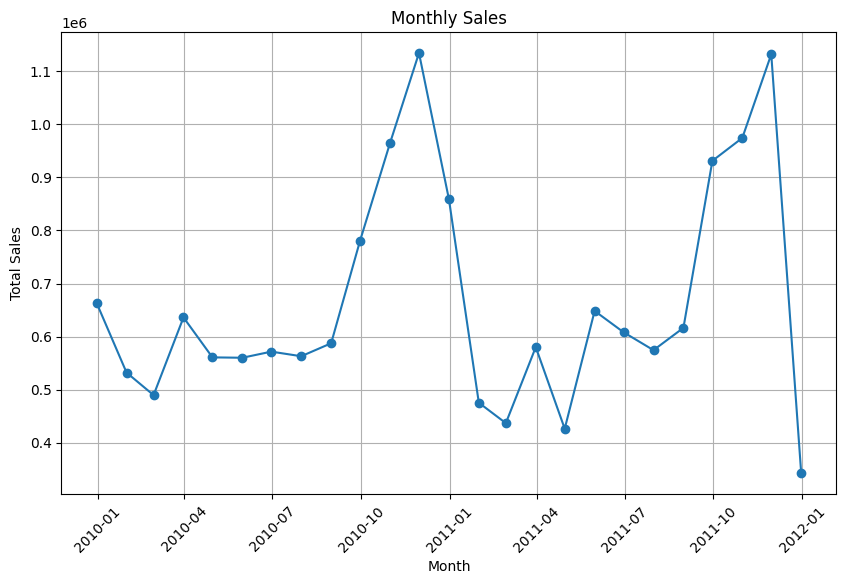

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a new column 'TotalPrice' by multiplying 'Quantity' and 'Price'
retail_data['TotalPrice'] = retail_data['Quantity'] * retail_data['Price']

# Convert the 'InvoiceDate' column to datetime type
retail_data['InvoiceDate'] = pd.to_datetime(retail_data['InvoiceDate'])

# Group the data by month and sum the 'TotalPrice'
monthly_sales = retail_data.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['TotalPrice'].sum()

# Create a plot of monthly sales
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [72]:
# Formulate a question to ask Claude
question = (f"You are a data analyst. Write a python code to display the results of columns ‘Quantity’ and ‘Price’ by months for dataset {retail_data.head(10).to_string()}. Make 2 bar plots with seaborn.")
# Use the Messages API for a single query or stateless multi-turn conversations.
response = client.messages.create(
    model=model,
    messages=[
        {"role": "user", "content": question}
    ],
    max_tokens=1024
)
# Assuming 'stream' is the correct method to get the streamed response:
# Note: This is based on the latest info you provided but might need to adapt if method names have changed in SDK.
try:
    with client.messages.stream(
        model=model,
        messages=[{"role": "user", "content": question}],
        max_tokens=1024
    ) as stream:
        for text in stream.text_stream:
            print(text, end="", flush=True)
except Exception as e:
    print(f"Error during streaming: {str(e)}")

To display the results of columns 'Quantity' and 'Price' by months using Seaborn, you can use the following Python code:

```python
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a variable called 'df'
# Convert the 'InvoiceDate' column to datetime if it's not already
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract the month from 'InvoiceDate' and create a new column 'Month'
df['Month'] = df['InvoiceDate'].dt.strftime('%B')

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the bar chart for Quantity by Month
sns.barplot(x='Month', y='Quantity', data=df, ax=ax1)
ax1.set_title('Quantity by Month')
ax1.set_xlabel('Month')
ax1.set_ylabel('Quantity')
ax1.tick_params(axis='x', rotation=45)

# Plot the bar chart for Price by Month
sns.barplot(x='Month', y='Price', data=df, ax=ax2)
ax2.set_title('Price by Month')
ax2.set_xlabel('Month')
ax2.set_ylabel('Price')
ax2.

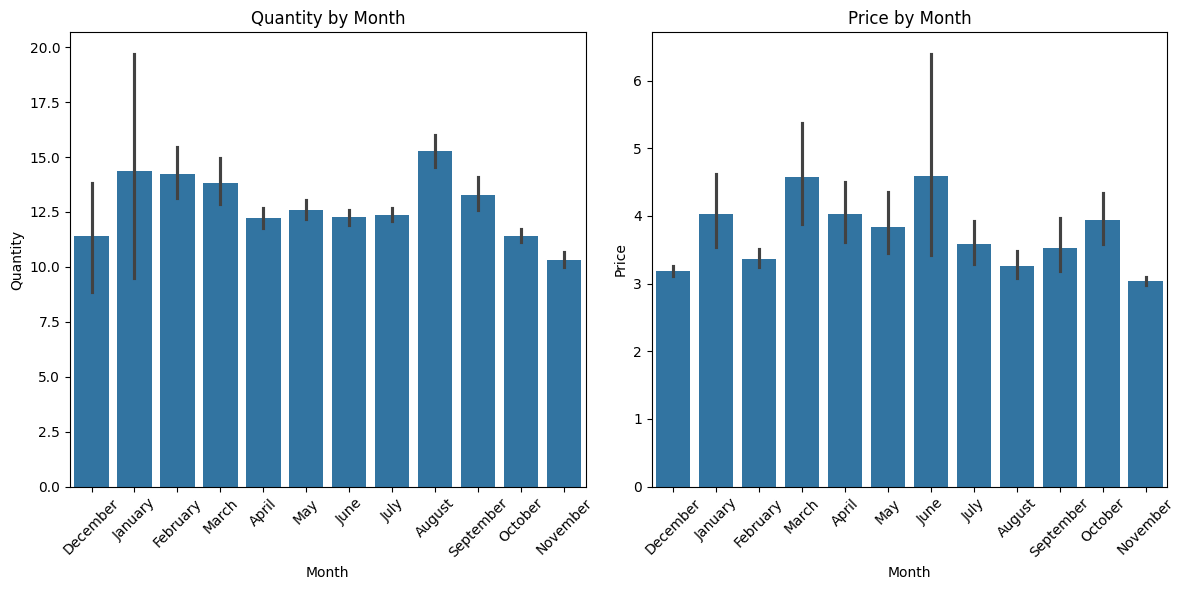

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the month from 'InvoiceDate' and create a new column 'Month'
retail_data['Month'] = retail_data['InvoiceDate'].dt.strftime('%B')

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the bar chart for Quantity by Month
sns.barplot(x='Month', y='Quantity', data=retail_data, ax=ax1)
ax1.set_title('Quantity by Month')
ax1.set_xlabel('Month')
ax1.set_ylabel('Quantity')
ax1.tick_params(axis='x', rotation=45)

# Plot the bar chart for Price by Month
sns.barplot(x='Month', y='Price', data=retail_data, ax=ax2)
ax2.set_title('Price by Month')
ax2.set_xlabel('Month')
ax2.set_ylabel('Price')
ax2.tick_params(axis='x', rotation=45)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

In [76]:
# Formulate a question to ask Claude
question = (f"You are a data analyst. Provide insights into sales trends for dataset {retail_data.head(30).to_string()} and apply the insights to forecast sales for the next quarter using basic time series analysis methods.")
# Use the Messages API for a single query or stateless multi-turn conversations.
response = client.messages.create(
    model=model,
    messages=[
        {"role": "user", "content": question}
    ],
    max_tokens=1024
)
# Assuming 'stream' is the correct method to get the streamed response:
# Note: This is based on the latest info you provided but might need to adapt if method names have changed in SDK.
try:
    with client.messages.stream(
        model=model,
        messages=[{"role": "user", "content": question}],
        max_tokens=1024
    ) as stream:
        for text in stream.text_stream:
            print(text, end="", flush=True)
except Exception as e:
    print(f"Error during streaming: {str(e)}")

Based on the provided dataset, I can provide some insights into the sales trends and forecast sales for the next quarter using basic time series analysis methods. Please note that the dataset only contains data for December, so the analysis and forecast will be limited.

Insights:
1. The dataset contains sales data for various products, with a total of 30 transactions in December.
2. The total revenue generated in December is £858.93, calculated by summing the 'TotalPrice' column.
3. The most popular product categories seem to be home decor items, such as Christmas ornaments, building block words, and wall clocks.
4. The average order value (AOV) for December is £28.63, calculated by dividing the total revenue by the number of transactions.
5. All sales in the dataset are from the United Kingdom, indicating a strong customer base in that region.

Forecasting sales for the next quarter:
Given the limited data available (only for December), we can use a simple moving average method to fo

In [80]:
# Formulate a question to ask Claude
question = (f"You are a data analyst. Wrtie a pythone code to apply a simple moving average (SMA) for the next quarter's sales forecast for dataset https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci. Calculate the SMA based on the last few months' sales data. Write a brief report how this method provides a basic forecast and its limitations.")
# Use the Messages API for a single query or stateless multi-turn conversations.
response = client.messages.create(
    model=model,
    messages=[
        {"role": "user", "content": question}
    ],
    max_tokens=1024
)
# Assuming 'stream' is the correct method to get the streamed response:
# Note: This is based on the latest info you provided but might need to adapt if method names have changed in SDK.
try:
    with client.messages.stream(
        model=model,
        messages=[{"role": "user", "content": question}],
        max_tokens=1024
    ) as stream:
        for text in stream.text_stream:
            print(text, end="", flush=True)
except Exception as e:
    print(f"Error during streaming: {str(e)}")

To apply a simple moving average (SMA) for the next quarter's sales forecast using the online retail dataset from Kaggle, you can use the following Python code:

```python
import pandas as pd

# Load the dataset
df = pd.read_excel('online_retail_II.xlsx')

# Convert the InvoiceDate column to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract the year and month from the InvoiceDate column
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

# Group the data by year and month, and calculate the total sales for each month
monthly_sales = df.groupby(['Year', 'Month'])['Price'].sum().reset_index()

# Calculate the simple moving average (SMA) for the next quarter
window_size = 3  # Number of months to consider for the SMA
monthly_sales['SMA'] = monthly_sales['Price'].rolling(window=window_size).mean()

# Assuming the last month in the dataset is the most recent month
last_month = monthly_sales.iloc[-1]
next_quarter_forecast = last_month['SMA

In [81]:
# Extract the year and month from the InvoiceDate column
retail_data['Year'] = retail_data['InvoiceDate'].dt.year
# df['Month'] = df['InvoiceDate'].dt.month

# Group the data by year and month, and calculate the total sales for each month
monthly_sales = retail_data.groupby(['Year', 'Month'])['Price'].sum().reset_index()

# Calculate the simple moving average (SMA) for the next quarter
window_size = 3  # Number of months to consider for the SMA
monthly_sales['SMA'] = monthly_sales['Price'].rolling(window=window_size).mean()

# Assuming the last month in the dataset is the most recent month
last_month = monthly_sales.iloc[-1]
next_quarter_forecast = last_month['SMA']

print(f"Next quarter's sales forecast (SMA): {next_quarter_forecast:.2f}")

Next quarter's sales forecast (SMA): 169303.65


Brief report:

The simple moving average (SMA) method provides a basic forecast for the next quarter's sales by taking the average of the sales data from the last few months. In this case, we calculated the SMA based on the last three months' sales data.

The SMA method is straightforward and easy to implement. It smooths out short-term fluctuations in the sales data and provides a trend-based forecast. However, it has several limitations:

1. Sensitivity to outliers: The SMA is sensitive to extreme values or outliers in the sales data. If there are any unusually high or low sales figures in the recent months, they can significantly impact the forecast.

2. Equal weighting: The SMA assigns equal weight to each data point within the chosen window. This means that older data points have the same influence as more recent ones, which may not accurately reflect the current trend.

3. Lag in trend detection: The SMA tends to lag behind the actual trend. It may not quickly respond to sudden changes or shifts in the sales pattern.

4. Lack of seasonality and external factors: The SMA does not consider seasonality or other external factors that may influence sales. It solely relies on the historical sales data without accounting for any additional variables.

5. Limited to short-term forecasting: The SMA is more suitable for short-term forecasting, as it only considers a limited number of recent data points. It may not provide accurate long-term forecasts.

To improve the sales forecast, you can consider more advanced forecasting techniques such as exponential smoothing, ARIMA models, or machine learning algorithms. These methods can incorporate seasonality, trend, and other relevant factors to provide more accurate and robust forecasts.

It's important to note that the accuracy of the forecast depends on the quality and completeness of the sales data. Ensure that the dataset is clean, consistent, and covers a sufficient time period to capture meaningful patterns and trends.

Remember to validate the forecast against actual sales data and update the model periodically to adapt to changing market conditions and customer behaviors.